In [230]:
import pandas as pd
from astropy.utils.metadata.utils import dtype
from bokeh.plotting import figure
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_excel("../datasets/premiums_with_life_style_USD.xlsx")
print(df.shape)
df.head()

(10000, 15)


,Age,Gender,Region,Marital_status,Physical_Activity,Stress_Level,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Medical History,Insurance_Plan,Income_Level,Income_USD,Annual_Premium_Amount
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,High blood pressure,Gold,320$ -500$,474.358974,358.256410
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,No Disease,Silver,130$ - 320$,128.205128,270.615385
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,No Disease,Bronze,<130$,115.384615,108.448718
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,Thyroid,Silver,<130$,115.384615,278.012821
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,High blood pressure & Heart disease,Bronze,130$ - 320$,166.666667,204.923077


In [231]:
df['Income_USD'] = df['Income_USD'].apply(lambda x : round(x))
df.head()

,Age,Gender,Region,Marital_status,Physical_Activity,Stress_Level,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Medical History,Insurance_Plan,Income_Level,Income_USD,Annual_Premium_Amount
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,High blood pressure,Gold,320$ -500$,474,358.256410
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,No Disease,Silver,130$ - 320$,128,270.615385
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,No Disease,Bronze,<130$,115,108.448718
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,Thyroid,Silver,<130$,115,278.012821
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,High blood pressure & Heart disease,Bronze,130$ - 320$,167,204.923077


#### I / Cleaning Data

In [232]:
# Check null 
df.isna().sum()

Age                      0
Gender                   0
Region                   0
Marital_status           0
Physical_Activity        0
Stress_Level             0
Number Of Dependants     0
BMI_Category             0
Smoking_Status           9
Employment_Status        7
Medical History          0
Insurance_Plan           0
Income_Level             0
Income_USD               0
Annual_Premium_Amount    0
dtype: int64

In [233]:
df[df.isnull().any(axis=1)]

,Age,Gender,Region,Marital_status,Physical_Activity,Stress_Level,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Medical History,Insurance_Plan,Income_Level,Income_USD,Annual_Premium_Amount
1330,21,Female,Southwest,Unmarried,Medium,Medium,1,Underweight,NaN,Freelancer,High blood pressure,Bronze,130$ - 320$,154,95.884615
1461,70,Male,Northeast,Married,Medium,Medium,1,Underweight,Regular,NaN,High blood pressure,Bronze,>500$,115,225.410256
2483,47,Male,Southeast,Married,Medium,High,4,Normal,NaN,Freelancer,Diabetes,Gold,<130$,90,375.153846
3196,31,Male,Southwest,Married,High,Medium,4,Overweight,NaN,Self-Employed,High blood pressure,Gold,130$ - 320$,269,317.589744
4367,20,Male,Southeast,Unmarried,High,Medium,0,Obesity,NaN,Salaried,No Disease,Bronze,<130$,64,125.653846
5486,34,Male,Northwest,Married,Medium,Medium,4,Normal,NaN,Self-Employed,Thyroid,Silver,130$ - 320$,308,225.141026
5507,33,Female,Southwest,Unmarried,Medium,Medium,1,Obesity,NaN,Freelancer,No Disease,Silver,320$ -500$,321,237.333333
5683,61,Female,Southwest,Married,High,High,1,Overweight,NaN,Freelancer,High blood pressure & Heart disease,Silver,<130$,64,412.679487
7606,18,Female,Northeast,Unmarried,Medium,Medium,2,Underweight,No Smoking,NaN,No Disease,Silver,>500$,115,114.102564
7725,55,Female,Northwest,Married,High,Medium,3,Obesity,NaN,Freelancer,Diabetes,Gold,<130$,115,416.448718


In [234]:
get_income_USD = df.groupby('Income_Level')['Income_USD'].median()
get_income_USD

Income_Level
130$ - 320$    218.0
320$ -500$     410.0
<130$           64.0
>500$          897.0
Name: Income_USD, dtype: float64

In [235]:
get_income_USD['130$ - 320$']

218.0

In [236]:
df['Smoking_Status'].value_counts()

Smoking_Status
No Smoking    5707
Regular       2785
Occasional    1499
Name: count, dtype: int64

In [237]:
df['Employment_Status'].value_counts()

Employment_Status
Salaried         4199
Self-Employed    3075
Freelancer       2719
Name: count, dtype: int64

In [238]:
df['Smoking_Status'].fillna("No Smoking", inplace=True)
df['Employment_Status'].fillna("Salaried", inplace=True)
df[df.isnull().any(axis=1)]

/var/folders/q3/xgl4pwjd7lbg8skj81tsl0xr0000gn/T/ipykernel_1108/4235693166.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Smoking_Status'].fillna("No Smoking", inplace=True)
/var/folders/q3/xgl4pwjd7lbg8skj81tsl0xr0000gn/T/ipykernel_1108/4235693166.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

,Age,Gender,Region,Marital_status,Physical_Activity,Stress_Level,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Medical History,Insurance_Plan,Income_Level,Income_USD,Annual_Premium_Amount


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    10000 non-null  int64  
 1   Gender                 10000 non-null  object 
 2   Region                 10000 non-null  object 
 3   Marital_status         10000 non-null  object 
 4   Physical_Activity      10000 non-null  object 
 5   Stress_Level           10000 non-null  object 
 6   Number Of Dependants   10000 non-null  int64  
 7   BMI_Category           10000 non-null  object 
 8   Smoking_Status         10000 non-null  object 
 9   Employment_Status      10000 non-null  object 
 10  Medical History        10000 non-null  object 
 11  Insurance_Plan         10000 non-null  object 
 12  Income_Level           10000 non-null  object 
 13  Income_USD             10000 non-null  int64  
 14  Annual_Premium_Amount  10000 non-null  float64
dtypes: 

In [240]:
df.describe()

,Age,Number Of Dependants,Income_USD,Annual_Premium_Amount
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,41.316300,3.192900,299.237800,250.064922
std,57.971661,21.650454,414.138418,114.021143
min,18.000000,0.000000,13.000000,45.923077
25%,24.000000,0.000000,77.000000,150.996795
50%,37.000000,2.000000,205.000000,247.589744
75%,50.000000,3.000000,397.000000,339.673077
max,1178.000000,456.000000,12308.000000,587.871795


### Get rid of outliers

<Axes: xlabel='Age', ylabel='Count'>

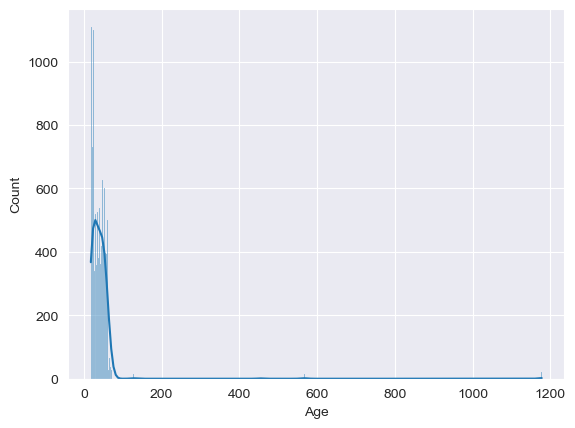

In [241]:
# Check Age 
sns.histplot(df, x = 'Age', kde = True)

In [242]:
df['Age'].quantile(0.999)

1178.0

In [243]:
print(df[df['Age'] >= 100].shape )
df[df['Age'] >= 100] 

(58, 15)


,Age,Gender,Region,Marital_status,Physical_Activity,Stress_Level,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Medical History,Insurance_Plan,Income_Level,Income_USD,Annual_Premium_Amount
79,128,Female,Northwest,Married,Low,High,3,Obesity,Occasional,Self-Employed,Heart disease,Silver,320$ -500$,487,393.538462
129,128,Male,Southeast,Married,Low,High,3,Obesity,Regular,Self-Employed,No Disease,Gold,130$ - 320$,154,475.141026
170,1178,Male,Southwest,Unmarried,Medium,Medium,0,Normal,Regular,Salaried,Heart disease,Silver,<130$,64,235.243590
533,567,Male,Southeast,Married,Medium,Medium,2,Normal,Regular,Self-Employed,High blood pressure,Gold,>500$,551,404.423077
652,456,Female,Southeast,Unmarried,Medium,Low,1,Normal,No Smoking,Salaried,Diabetes & Thyroid,Gold,>500$,667,204.192308
767,1178,Female,Southeast,Unmarried,Medium,High,0,Obesity,No Smoking,Self-Employed,Heart disease,Gold,320$ -500$,500,476.679487
826,456,Female,Southwest,Unmarried,Low,Medium,2,Obesity,No Smoking,Self-Employed,Diabetes & High blood pressure,Silver,<130$,26,360.076923
1426,1178,Female,Northwest,Unmarried,Medium,Medium,0,Normal,Regular,Self-Employed,No Disease,Silver,320$ -500$,397,167.871795
1554,1178,Male,Southwest,Unmarried,High,Low,0,Normal,No Smoking,Freelancer,Diabetes,Silver,320$ -500$,500,120.807692
1997,128,Male,Southwest,Unmarried,Low,Medium,0,Obesity,No Smoking,Salaried,Thyroid,Bronze,<130$,64,227.089744


In [244]:
get_age_by_income_lv=df.groupby('Income_Level')['Age'].median()
get_age_by_income_lv

Income_Level
130$ - 320$    37.0
320$ -500$     39.0
<130$          37.0
>500$          38.0
Name: Age, dtype: float64

In [245]:
df['Age'] = df.apply(lambda row : get_age_by_income_lv[row['Income_Level']] if row['Age'] >= 100 else row['Age'], axis = 1)
df[df['Age'] >= 100] 
df['Age'] = df['Age'].astype('int64')

In [246]:
df.describe()

,Age,Number Of Dependants,Income_USD,Annual_Premium_Amount
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,37.749100,3.192900,299.237800,250.064922
std,13.938995,21.650454,414.138418,114.021143
min,18.000000,0.000000,13.000000,45.923077
25%,24.000000,0.000000,77.000000,150.996795
50%,37.000000,2.000000,205.000000,247.589744
75%,50.000000,3.000000,397.000000,339.673077
max,72.000000,456.000000,12308.000000,587.871795


In [247]:
# Check Number of Dependants 
df['Number Of Dependants'].quantile(0.99)

5.0

In [248]:
print(df[df['Number Of Dependants'] > 5 ].shape)
df[df['Number Of Dependants'] > 5 ]

(47, 15)


,Age,Gender,Region,Marital_status,Physical_Activity,Stress_Level,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Medical History,Insurance_Plan,Income_Level,Income_USD,Annual_Premium_Amount
17,42,Male,Southwest,Married,Medium,Medium,456,Overweight,Occasional,Salaried,High blood pressure,Silver,130$ - 320$,128,259.141026
97,21,Male,Southwest,Unmarried,Medium,Medium,456,Underweight,Regular,Freelancer,No Disease,Silver,>500$,1244,175.282051
413,18,Female,Southeast,Unmarried,High,Low,456,Underweight,Regular,Freelancer,No Disease,Bronze,<130$,115,110.012821
584,39,Male,Southeast,Unmarried,High,High,78,Normal,No Smoking,Freelancer,Diabetes,Bronze,<130$,26,162.012821
746,23,Female,Southwest,Unmarried,Medium,Medium,456,Normal,No Smoking,Freelancer,Diabetes,Bronze,130$ - 320$,128,96.769231
856,44,Female,Southeast,Married,Medium,Low,78,Overweight,No Smoking,Salaried,No Disease,Bronze,>500$,897,138.423077
948,48,Male,Southwest,Married,High,Medium,456,Overweight,Regular,Salaried,Diabetes,Bronze,130$ - 320$,231,218.064103
993,22,Male,Southwest,Unmarried,Medium,Medium,78,Normal,No Smoking,Freelancer,No Disease,Bronze,130$ - 320$,282,68.179487
1381,19,Female,Southeast,Married,High,High,78,Overweight,No Smoking,Freelancer,No Disease,Silver,>500$,1244,157.448718
1527,43,Male,Southeast,Unmarried,Medium,Low,456,Overweight,Regular,Salaried,Diabetes,Gold,320$ -500$,513,363.423077


In [249]:
get_dependents_by_age=df.groupby('Age')['Number Of Dependants'].median()
get_dependents_by_age

Age
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    1.0
26    3.0
27    3.0
28    3.0
29    3.0
30    2.0
31    3.0
32    2.0
33    3.0
34    3.0
35    3.0
36    3.0
37    2.0
38    3.0
39    2.0
40    3.0
41    2.0
42    3.0
43    3.0
44    2.0
45    2.0
46    3.0
47    3.0
48    3.0
49    3.0
50    3.0
51    3.0
52    3.0
53    3.0
54    3.0
55    3.0
56    3.0
57    3.0
58    3.0
59    3.0
60    3.0
61    1.0
62    1.0
63    1.0
64    1.0
65    1.0
66    1.0
67    1.0
68    1.0
69    1.0
70    1.0
71    1.0
72    1.0
Name: Number Of Dependants, dtype: float64

In [250]:
df['Number Of Dependants'] = df.apply(lambda row : get_dependents_by_age[row['Age']] if row['Number Of Dependants'] > 5 else row['Number Of Dependants'], axis = 1)
df[df['Number Of Dependants'] > 5 ]

,Age,Gender,Region,Marital_status,Physical_Activity,Stress_Level,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Medical History,Insurance_Plan,Income_Level,Income_USD,Annual_Premium_Amount


In [251]:
df.describe()

,Age,Number Of Dependants,Income_USD,Annual_Premium_Amount
count,10000.000000,10000.00000,10000.000000,10000.000000
mean,37.749100,1.91870,299.237800,250.064922
std,13.938995,1.50217,414.138418,114.021143
min,18.000000,0.00000,13.000000,45.923077
25%,24.000000,0.00000,77.000000,150.996795
50%,37.000000,2.00000,205.000000,247.589744
75%,50.000000,3.00000,397.000000,339.673077
max,72.000000,5.00000,12308.000000,587.871795


In [252]:
# Check Income USD 
df['Income_USD'].quantile(0.999)

1287.385000001097

<Axes: ylabel='Income_USD'>

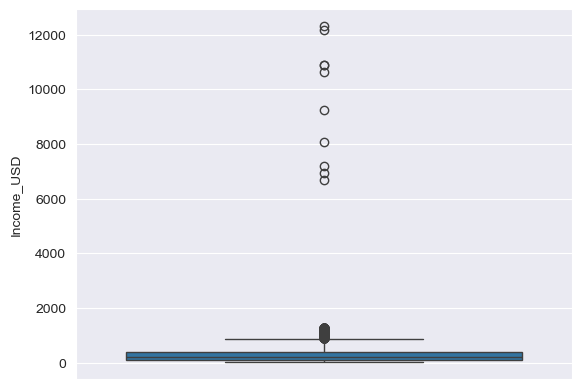

In [253]:
sns.boxplot(df, y = 'Income_USD')

In [254]:
Q1  = df['Income_USD'].quantile(0.25)
Q3 = df['Income_USD'].quantile(0.75)
IQR = Q3 - Q1
low = Q1 - 2*IQR 
high = Q3 + 2*IQR 
low, high


(-563.0, 1037.0)

In [255]:
print(df[df['Income_USD'] > 1000].shape)
df[df['Income_USD'] > 1000]

(493, 15)


,Age,Gender,Region,Marital_status,Physical_Activity,Stress_Level,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Medical History,Insurance_Plan,Income_Level,Income_USD,Annual_Premium_Amount
24,20,Female,Southwest,Unmarried,Low,Medium,1.0,Overweight,Regular,Freelancer,No Disease,Silver,>500$,1090,209.000000
46,49,Female,Southeast,Married,Medium,High,2.0,Normal,No Smoking,Freelancer,Thyroid,Gold,>500$,1179,398.166667
51,18,Female,Southeast,Unmarried,High,High,0.0,Normal,No Smoking,Salaried,No Disease,Silver,>500$,1205,142.256410
72,33,Female,Northwest,Married,High,Medium,4.0,Normal,No Smoking,Freelancer,Diabetes,Gold,>500$,1218,294.846154
87,59,Female,Southwest,Married,Medium,Medium,3.0,Obesity,Occasional,Salaried,Thyroid,Gold,>500$,1128,437.846154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9851,25,Female,Southwest,Unmarried,Medium,High,0.0,Normal,Regular,Freelancer,No Disease,Silver,>500$,1231,189.051282
9942,27,Male,Northwest,Married,Medium,Low,3.0,Obesity,No Smoking,Self-Employed,No Disease,Gold,>500$,1115,332.358974
9957,32,Female,Southeast,Unmarried,Medium,Medium,1.0,Obesity,No Smoking,Salaried,No Disease,Gold,>500$,1038,329.384615
9968,41,Male,Northwest,Unmarried,Low,Low,0.0,Underweight,No Smoking,Salaried,Diabetes,Silver,>500$,1115,255.910256


In [256]:
get_income_usd_by_age = df.groupby('Age')['Income_USD'].median()
get_income_usd_by_age

Age
18    256.0
19    192.0
20    218.0
21    205.0
22    154.0
23    231.0
24    179.0
25    218.0
26    218.0
27    218.0
28    154.0
29    141.0
30    192.0
31    218.0
32    192.0
33    179.0
34    160.5
35    192.0
36    141.0
37    179.0
38    192.0
39    244.0
40    218.0
41    167.0
42    154.0
43    154.0
44    256.0
45    179.0
46    231.0
47    243.5
48    192.0
49    179.0
50    231.0
51    205.0
52    211.5
53    185.5
54    269.0
55    192.0
56    231.0
57    244.0
58    244.0
59    218.0
60    282.0
61    346.0
62    205.0
63    346.0
64    192.0
65    282.0
66    474.0
67    308.0
68     90.0
69    244.0
70    192.0
71    121.5
72    192.0
Name: Income_USD, dtype: float64

In [257]:
df['Income_USD'] = df.apply(lambda row : get_income_usd_by_age[row['Age']]  if row['Income_USD'] > 1000 else row['Income_USD'], axis = 1)
df[df['Income_USD'] > 1000]

,Age,Gender,Region,Marital_status,Physical_Activity,Stress_Level,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Medical History,Insurance_Plan,Income_Level,Income_USD,Annual_Premium_Amount


In [258]:
df.describe()

,Age,Number Of Dependants,Income_USD,Annual_Premium_Amount
count,10000.000000,10000.00000,10000.00000,10000.000000
mean,37.749100,1.91870,244.64535,250.064922
std,13.938995,1.50217,211.28743,114.021143
min,18.000000,0.00000,13.00000,45.923077
25%,24.000000,0.00000,77.00000,150.996795
50%,37.000000,2.00000,192.00000,247.589744
75%,50.000000,3.00000,346.00000,339.673077
max,72.000000,5.00000,1000.00000,587.871795


In [259]:
df['Number Of Dependants'] = df['Number Of Dependants'].astype('int64')
df['Income_USD'] = df['Income_USD'].astype('int64')
df.head()

,Age,Gender,Region,Marital_status,Physical_Activity,Stress_Level,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Medical History,Insurance_Plan,Income_Level,Income_USD,Annual_Premium_Amount
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,High blood pressure,Gold,320$ -500$,474,358.256410
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,No Disease,Silver,130$ - 320$,128,270.615385
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,No Disease,Bronze,<130$,115,108.448718
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,Thyroid,Silver,<130$,115,278.012821
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,High blood pressure & Heart disease,Bronze,130$ - 320$,167,204.923077


In [260]:
df['Annual_Premium_Amount'].quantile(0.995)

497.041538461538

<Axes: xlabel='Annual_Premium_Amount', ylabel='Count'>

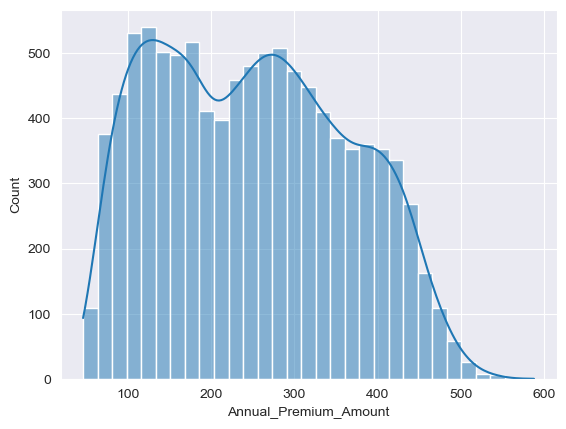

In [261]:
# Check Annual Premium Amount
sns.histplot(df, x = 'Annual_Premium_Amount', kde = True)

### Visualize the distribution of numeral columns with Annual_Premium_Amount

In [262]:
df.select_dtypes(include = ['int64', 'float64']).columns

Index(['Age', 'Number Of Dependants', 'Income_USD', 'Annual_Premium_Amount'], dtype='object')

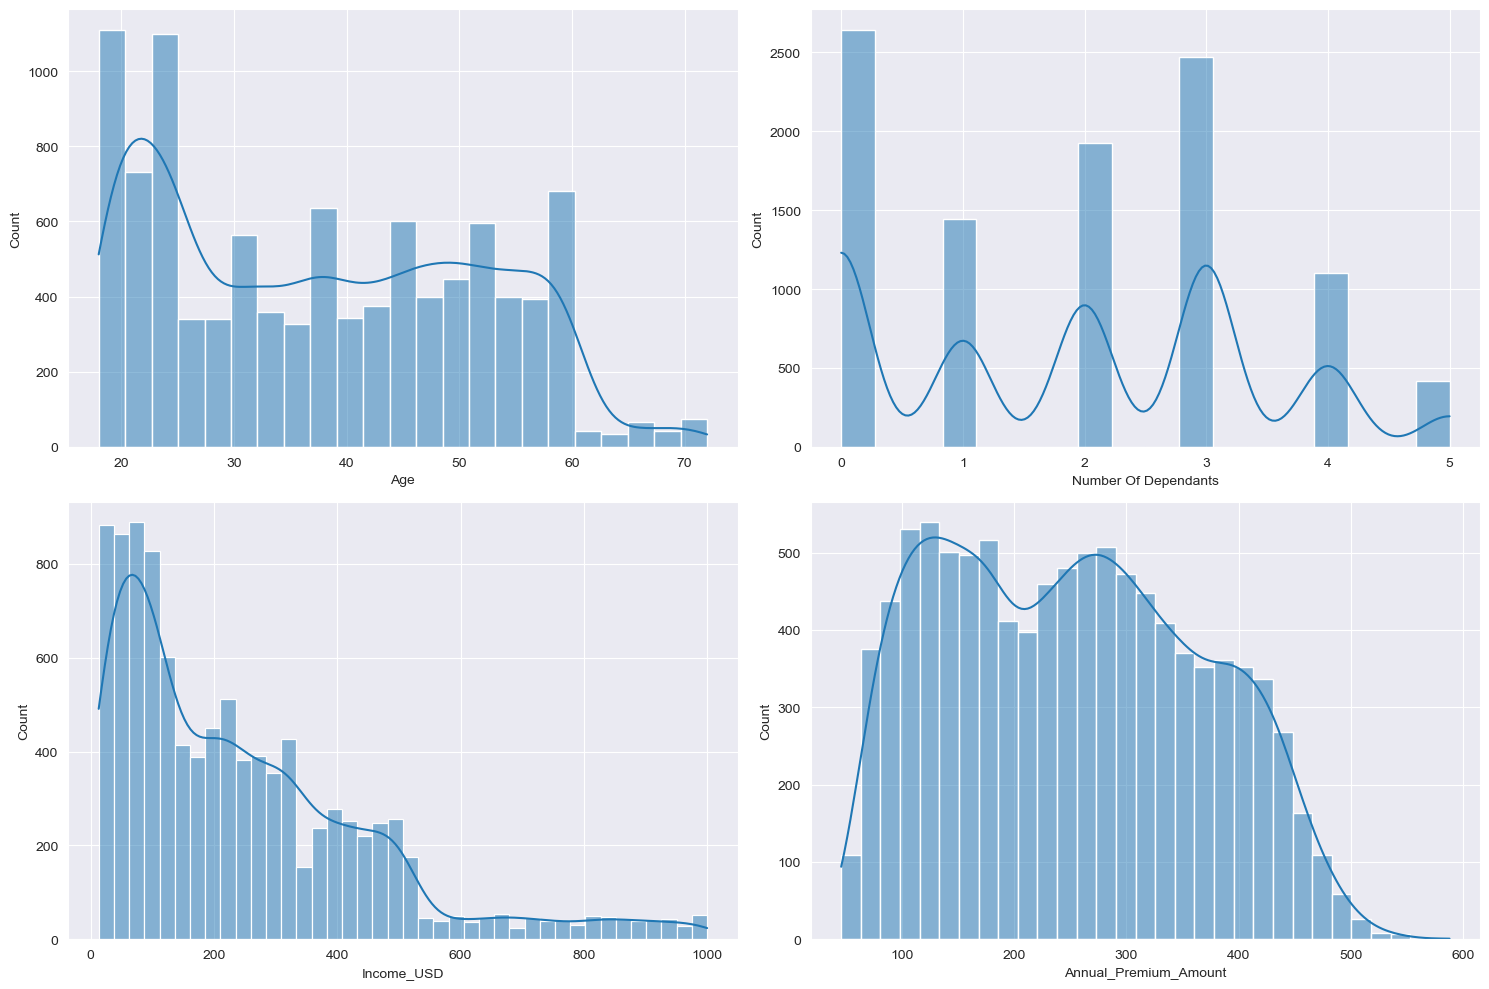

In [263]:
#Check outliers 
list_numeral1 = ['Age', 'Number Of Dependants', 'Income_USD','Annual_Premium_Amount']
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10))
axes = axes.flatten()
for idx, column in enumerate(list_numeral1):
    sns.histplot(df, x=column, kde = True, ax = axes[idx])
plt.tight_layout()
plt.show()

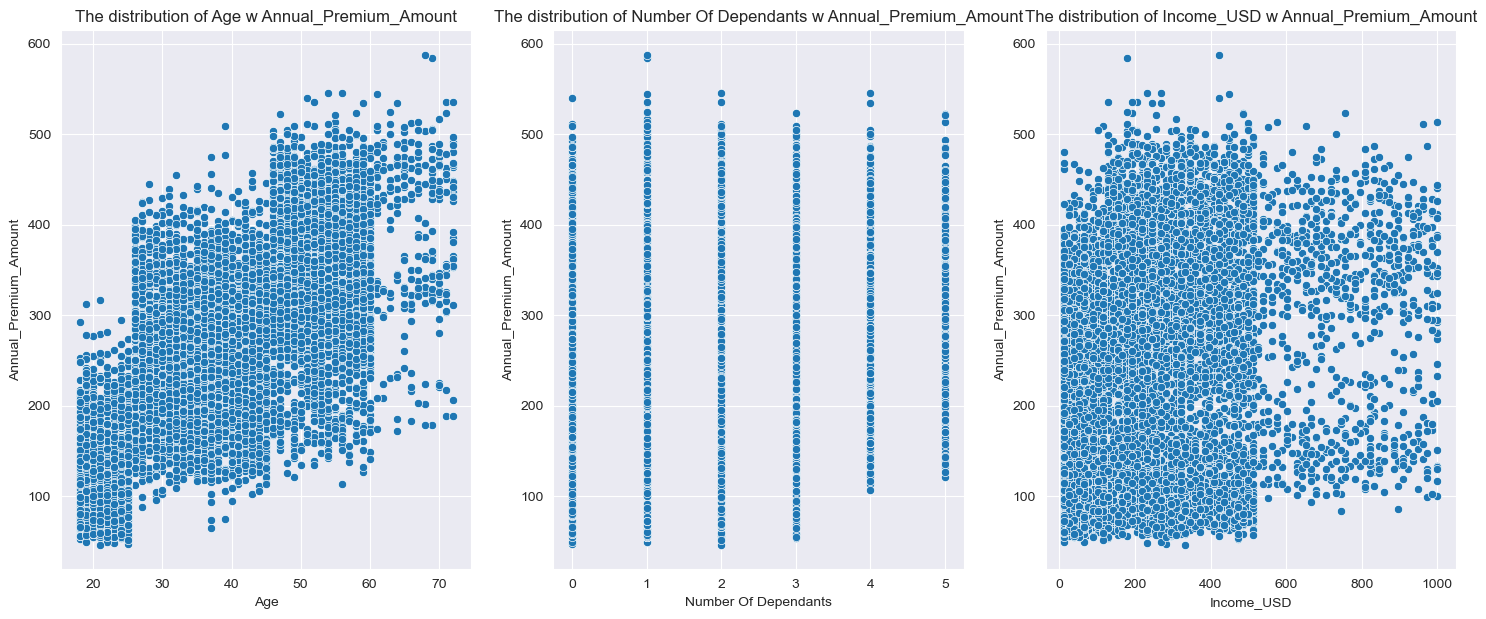

In [264]:
list_numeral2 = ['Age', 'Number Of Dependants', 'Income_USD']

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (18,7))
for idx, list in enumerate(list_numeral2):
    sns.scatterplot(df, x = list, y = 'Annual_Premium_Amount', ax = axes[idx])
    axes[idx].set_title(f"The distribution of {list} w Annual_Premium_Amount")

In [265]:
df.select_dtypes(exclude = ['int64', 'float64']).columns

Index(['Gender', 'Region', 'Marital_status', 'Physical_Activity',
       'Stress_Level', 'BMI_Category', 'Smoking_Status', 'Employment_Status',
       'Medical History', 'Insurance_Plan', 'Income_Level'],
      dtype='object')

In [266]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Physical_Activity',
       'Stress_Level', 'Number Of Dependants', 'BMI_Category',
       'Smoking_Status', 'Employment_Status', 'Medical History',
       'Insurance_Plan', 'Income_Level', 'Income_USD',
       'Annual_Premium_Amount'],
      dtype='object')

In [267]:
# Check wrong spell 
list_to_spell = ['Age', 'Gender', 'Region', 'Marital_status', 'Physical_Activity',
       'Stress_Level', 'Number Of Dependants', 'BMI_Category',
       'Smoking_Status', 'Employment_Status', 'Medical History',
       'Insurance_Plan', 'Income_Level', 'Income_USD',
       'Annual_Premium_Amount']
for column in list_to_spell:
    print(f"{column} : {df[column].unique()}")

Age : [56 38 18 55 22 33 53 39 42 44 27 43 30 31 48 37 20 45 60 21 40 54 23 29
 58 49 26 28 52 25 46 50 19 47 59 70 51 24 32 41 34 61 57 36 68 64 66 72
 35 71 67 62 69 65 63]
Gender : ['Female' 'Male']
Region : ['Southeast' 'Northeast' 'Southwest' 'Northwest']
Marital_status : ['Unmarried' 'Married']
Physical_Activity : ['Medium' 'Low' 'High']
Stress_Level : ['Medium' 'High' 'Low']
Number Of Dependants : [2 5 0 3 1 4]
BMI_Category : ['Normal' 'Overweight' 'Obesity' 'Underweight']
Smoking_Status : ['No Smoking' 'Occasional' 'Regular']
Employment_Status : ['Self-Employed' 'Freelancer' 'Salaried']
Medical History : ['High blood pressure' 'No Disease' 'Thyroid'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid' 'Diabetes'
 'Heart disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease']
Insurance_Plan : ['Gold' 'Silver' 'Bronze']
Income_Level : ['320$ -500$' '130$ - 320$' '<130$' '>500$']
Income_USD : [ 474  128  115  167   13   77  269  231  487  103  385  256  872  

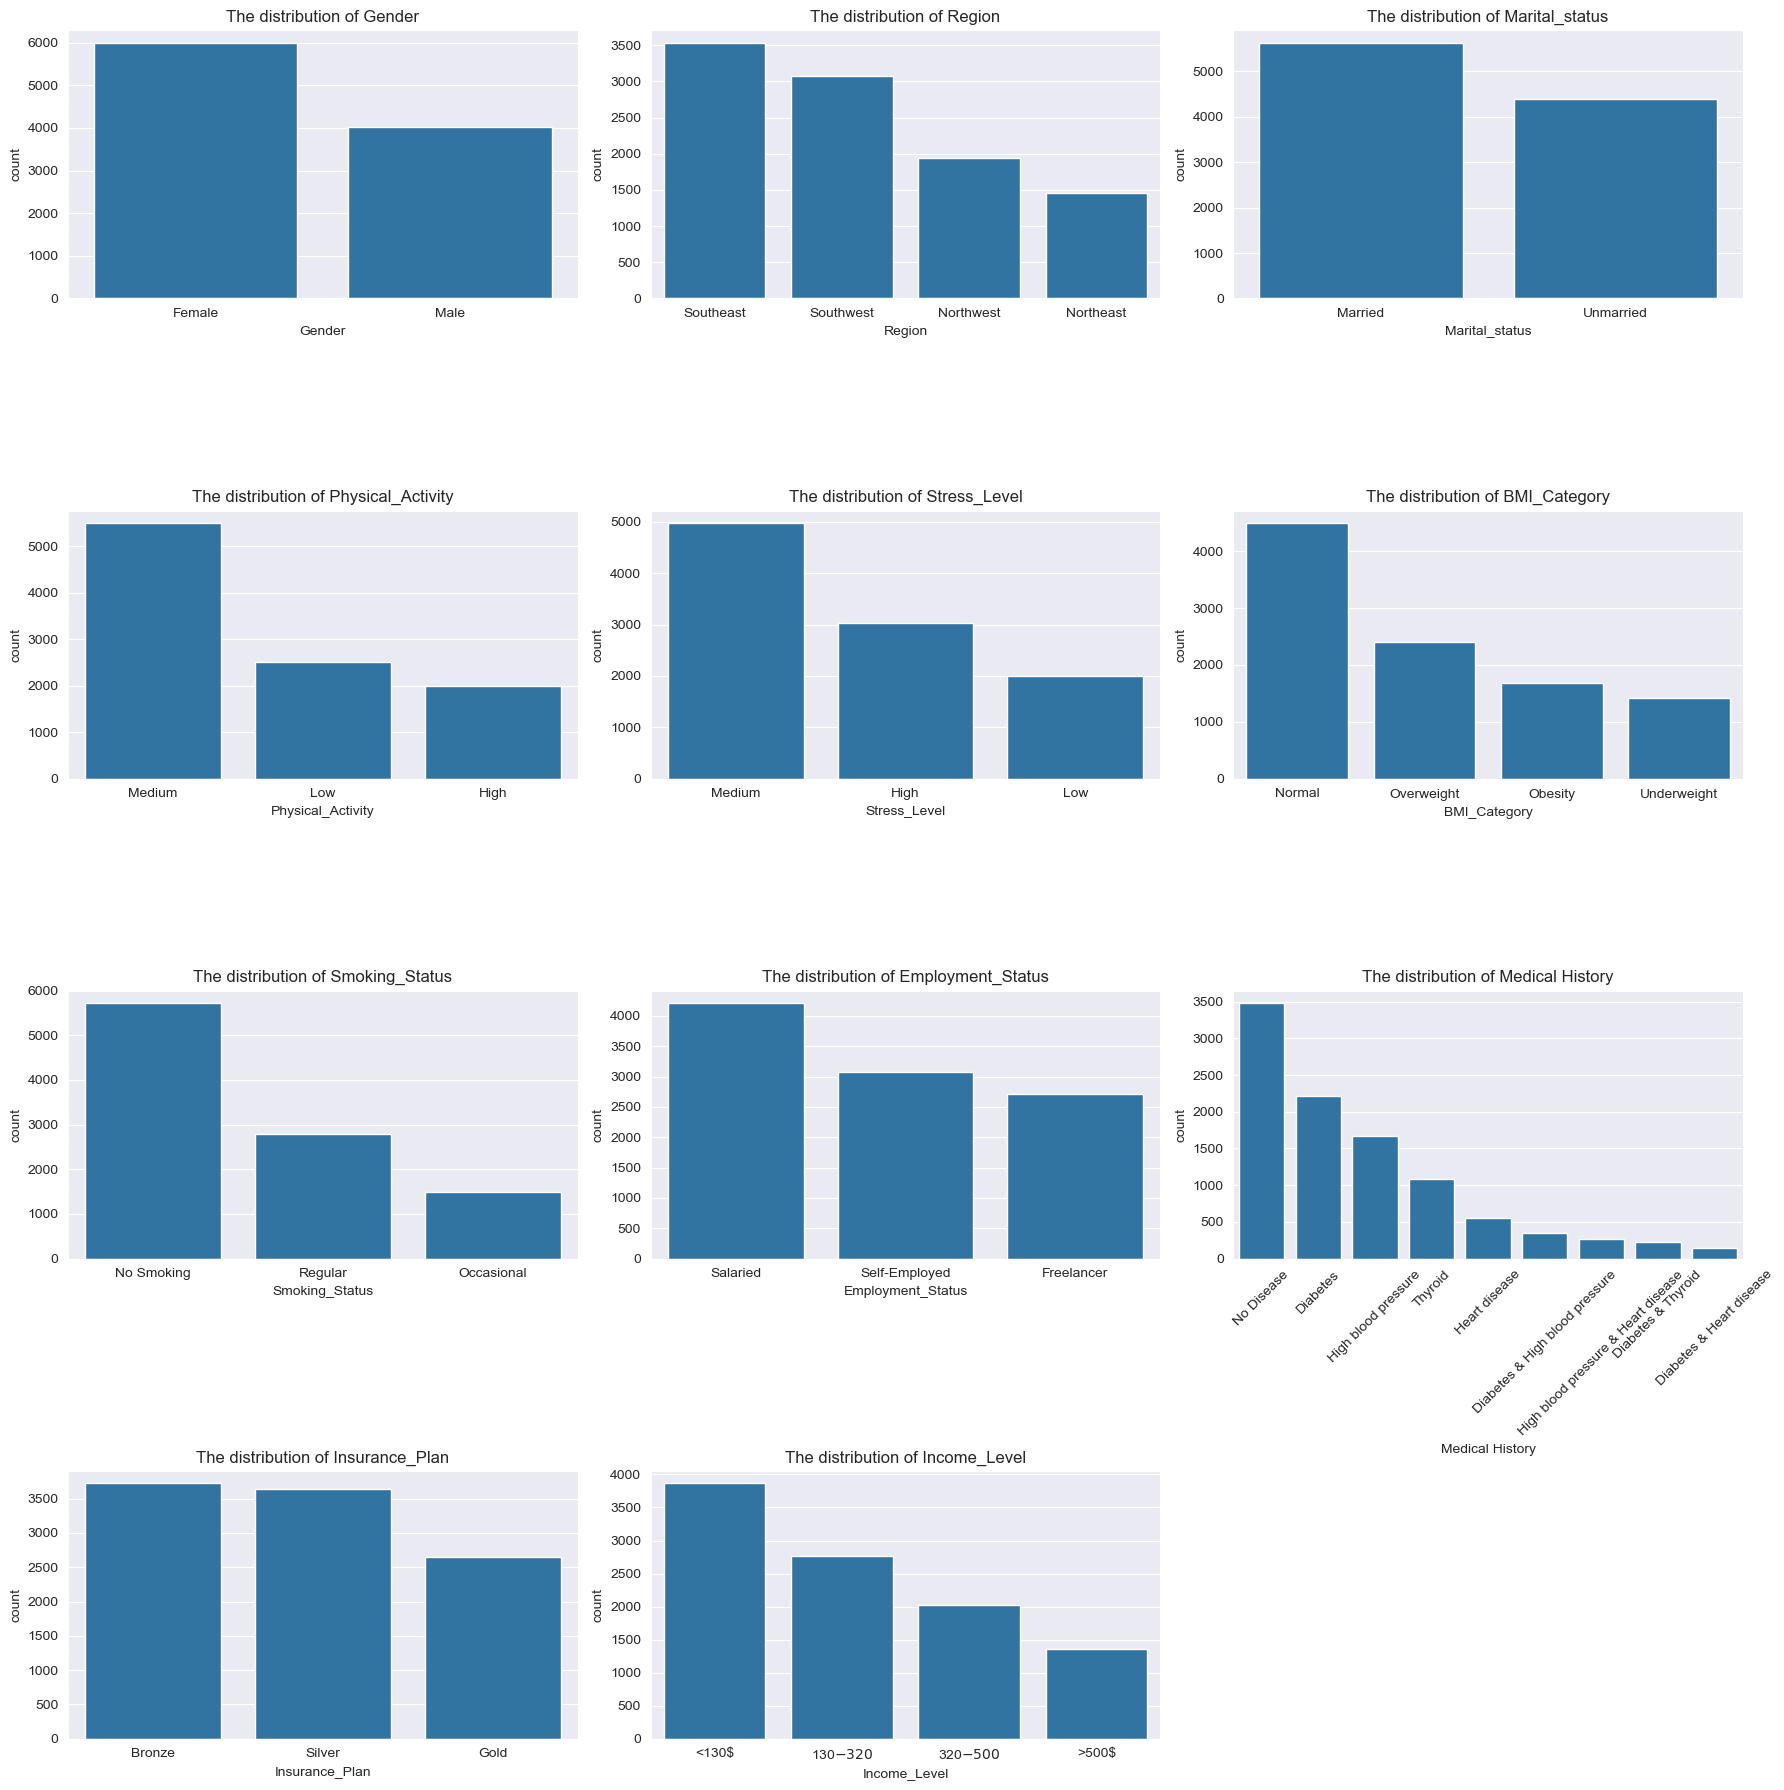

In [268]:
list_string = ['Gender', 'Region', 'Marital_status', 'Physical_Activity',
       'Stress_Level', 'BMI_Category', 'Smoking_Status', 'Employment_Status',
       'Medical History', 'Insurance_Plan', 'Income_Level']
fig2 , axes = plt.subplots(nrows = 4, ncols = 3, figsize = (18,18))
axes = axes.flatten()
for idx, list in enumerate(list_string):
    sort_value = df[list].value_counts().index
    sns.countplot(df, x = list, ax = axes[idx], order = sort_value)
    axes[idx].set_title(f"The distribution of {list}")
    if list == 'Medical History':
        axes[idx].tick_params(axis = 'x', rotation = 45)
fig2.delaxes(axes[-1])
plt.tight_layout()
plt.show()

### Check crosstab

<Axes: xlabel='Insurance_Plan', ylabel='Income_Level'>

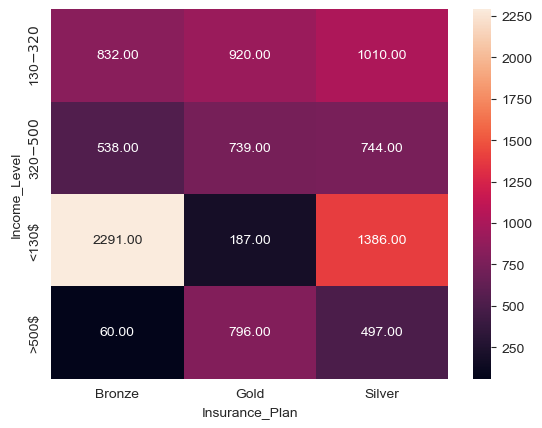

In [269]:
#Check crosstab income level vs income plan
crosstab = pd.crosstab(df['Income_Level'], df['Insurance_Plan'])
sns.heatmap(crosstab, annot=True, fmt='.2f')

### II / Feature Engineering 

In [270]:
df.head()

,Age,Gender,Region,Marital_status,Physical_Activity,Stress_Level,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Medical History,Insurance_Plan,Income_Level,Income_USD,Annual_Premium_Amount
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,High blood pressure,Gold,320$ -500$,474,358.256410
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,No Disease,Silver,130$ - 320$,128,270.615385
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,No Disease,Bronze,<130$,115,108.448718
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,Thyroid,Silver,<130$,115,278.012821
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,High blood pressure & Heart disease,Bronze,130$ - 320$,167,204.923077


In [271]:
# Calculate life_style_risk_score
Physical_Activity = {
    'High' : 0, 
    'Medium':1, 
    'Low' : 4
} 
Stress_Level = { 
    'High' : 4,
    'Medium' : 1, 
    'Low' : 0
}
df['physical'] = df['Physical_Activity'].map(Physical_Activity)
df['stress'] = df['Stress_Level'].map(Stress_Level)
df['life_style_risk_score'] = df['physical'] + df['stress']
max_score = 8
min_score = 0
df['life_style_risk'] = (df['life_style_risk_score'] - min_score )/ (max_score - min_score)
df.drop(['physical', 'stress','life_style_risk_score'], axis = 1, inplace = True)
df.head()

,Age,Gender,Region,Marital_status,Physical_Activity,Stress_Level,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Medical History,Insurance_Plan,Income_Level,Income_USD,Annual_Premium_Amount,life_style_risk
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,High blood pressure,Gold,320$ -500$,474,358.256410,0.250
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,No Disease,Silver,130$ - 320$,128,270.615385,1.000
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,No Disease,Bronze,<130$,115,108.448718,0.625
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,Thyroid,Silver,<130$,115,278.012821,0.125
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,High blood pressure & Heart disease,Bronze,130$ - 320$,167,204.923077,0.625


In [272]:
# One hot encode Medical history 
# df.drop(['disease1','disease2','total_risk_disease'], axis = 1)
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure": 6,
    "thyroid": 5,
    "no disease": 0,
    "None": 0
}
df[['disease1','disease2']] = df['Medical History'].str.split(" & ", expand = True).apply(lambda x: x.str.lower())
list_disease = ['disease1', 'disease2']
df.fillna('None', inplace = True)
df['total_risk_disease'] = 0
for disease in list_disease:
    df['total_risk_disease'] += df[disease].map(risk_scores)
# df['disease1'] = df['disease1'].map(risk_scores)
# df['disease2'] = df['disease2'].map(risk_scores)
# df['total_risk_disease'] = df['disease1'] + df['disease2']
min_score = df['total_risk_disease'].min()
max_score = df['total_risk_disease'].max()
df['total_risk_disease'] = (df['total_risk_disease'] - min_score) / (max_score - min_score)
df.drop(['disease1','disease2'], axis = 1, inplace = True)
df.head(10)

,Age,Gender,Region,Marital_status,Physical_Activity,Stress_Level,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Medical History,Insurance_Plan,Income_Level,Income_USD,Annual_Premium_Amount,life_style_risk,total_risk_disease
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,High blood pressure,Gold,320$ -500$,474,358.256410,0.250,0.428571
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,No Disease,Silver,130$ - 320$,128,270.615385,1.000,0.000000
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,No Disease,Bronze,<130$,115,108.448718,0.625,0.000000
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,Thyroid,Silver,<130$,115,278.012821,0.125,0.357143
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,High blood pressure & Heart disease,Bronze,130$ - 320$,167,204.923077,0.625,1.000000
5,33,Female,Northwest,Unmarried,Low,High,0,Normal,Regular,Freelancer,No Disease,Gold,<130$,13,363.948718,1.000,0.000000
6,53,Female,Northwest,Unmarried,Medium,Medium,0,Overweight,No Smoking,Self-Employed,No Disease,Silver,<130$,77,268.705128,0.250,0.000000
7,39,Female,Northwest,Married,High,Medium,3,Obesity,No Smoking,Salaried,Diabetes & Thyroid,Silver,130$ - 320$,269,290.256410,0.125,0.785714
8,42,Female,Southeast,Unmarried,Low,Medium,1,Normal,Occasional,Self-Employed,Thyroid,Silver,<130$,77,247.679487,0.625,0.357143
9,42,Female,Northwest,Married,Medium,Medium,4,Normal,Occasional,Self-Employed,Diabetes,Silver,130$ - 320$,231,245.512821,0.250,0.428571


In [273]:
df['Physical_Activity'].unique()
df['Insurance_Plan'].unique()
df['Income_Level'].unique()

array(['320$ -500$', '130$ - 320$', '<130$', '>500$'], dtype=object)

In [274]:
df2 = df.copy()
df2['Insurance_Plan'] = df2['Insurance_Plan'].map({'Bronze':1, 'Silver':2, 'Gold':3})
df2['Income_Level'] = df2['Income_Level'].map({'320$ -500$' :2, '130$ - 320$':1, '<130$' : 0, '>500$':3})
df2.head()

,Age,Gender,Region,Marital_status,Physical_Activity,Stress_Level,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Medical History,Insurance_Plan,Income_Level,Income_USD,Annual_Premium_Amount,life_style_risk,total_risk_disease
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,High blood pressure,3,2,474,358.256410,0.250,0.428571
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,No Disease,2,1,128,270.615385,1.000,0.000000
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,No Disease,1,0,115,108.448718,0.625,0.000000
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,Thyroid,2,0,115,278.012821,0.125,0.357143
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,High blood pressure & Heart disease,1,1,167,204.923077,0.625,1.000000


In [275]:
df2.select_dtypes(exclude = ['int64', 'float64']).columns

Index(['Gender', 'Region', 'Marital_status', 'Physical_Activity',
       'Stress_Level', 'BMI_Category', 'Smoking_Status', 'Employment_Status',
       'Medical History'],
      dtype='object')

In [276]:
df2_encoded = pd.get_dummies(df2, columns=['Gender', 'Region', 'Marital_status', 'BMI_Category', 'Smoking_Status',
       'Employment_Status'], drop_first = True, dtype=int)
df2_encoded.head()

,Age,Physical_Activity,Stress_Level,Number Of Dependants,Medical History,Insurance_Plan,Income_Level,Income_USD,Annual_Premium_Amount,life_style_risk,...,Region_Southeast,Region_Southwest,Marital_status_Unmarried,BMI_Category_Obesity,BMI_Category_Overweight,BMI_Category_Underweight,Smoking_Status_Occasional,Smoking_Status_Regular,Employment_Status_Salaried,Employment_Status_Self-Employed
0,56,Medium,Medium,2,High blood pressure,3,2,474,358.256410,0.250,...,1,0,1,0,0,0,0,0,0,1
1,38,Low,High,5,No Disease,2,1,128,270.615385,1.000,...,0,0,0,0,1,0,1,0,0,0
2,18,Medium,High,0,No Disease,1,0,115,108.448718,0.625,...,0,1,1,0,0,0,0,0,0,0
3,55,High,Medium,3,Thyroid,2,0,115,278.012821,0.125,...,0,0,0,0,1,0,1,0,1,0
4,22,Medium,High,2,High blood pressure & Heart disease,1,1,167,204.923077,0.625,...,1,0,1,0,0,0,0,1,0,1


In [277]:
df2_encoded.drop(['Stress_Level','Physical_Activity','Medical History'], axis = 1, inplace = True)

In [278]:
df2_encoded.columns

Index(['Age', 'Number Of Dependants', 'Insurance_Plan', 'Income_Level',
       'Income_USD', 'Annual_Premium_Amount', 'life_style_risk',
       'total_risk_disease', 'Gender_Male', 'Region_Northwest',
       'Region_Southeast', 'Region_Southwest', 'Marital_status_Unmarried',
       'BMI_Category_Obesity', 'BMI_Category_Overweight',
       'BMI_Category_Underweight', 'Smoking_Status_Occasional',
       'Smoking_Status_Regular', 'Employment_Status_Salaried',
       'Employment_Status_Self-Employed'],
      dtype='object')

### Check correlation

In [279]:
cm = df2_encoded.corr()
cm

,Age,Number Of Dependants,Insurance_Plan,Income_Level,Income_USD,Annual_Premium_Amount,life_style_risk,total_risk_disease,Gender_Male,Region_Northwest,Region_Southeast,Region_Southwest,Marital_status_Unmarried,BMI_Category_Obesity,BMI_Category_Overweight,BMI_Category_Underweight,Smoking_Status_Occasional,Smoking_Status_Regular,Employment_Status_Salaried,Employment_Status_Self-Employed
Age,1.000000,0.399329,0.490608,0.027459,0.030559,0.746786,0.010369,0.404782,-0.000181,0.001025,0.002450,-0.009221,-0.514735,0.157755,0.130410,-0.137553,0.039696,0.018226,-0.038916,0.319865
Number Of Dependants,0.399329,1.000000,0.234443,0.007740,0.021356,0.389731,-0.009165,0.352489,-0.009212,-0.002923,0.016694,-0.008681,-0.832126,0.098362,0.099461,-0.105481,0.058535,0.061993,0.052183,0.106469
Insurance_Plan,0.490608,0.234443,1.000000,0.462230,0.392375,0.826684,0.017378,0.219336,0.042308,-0.007611,0.005738,0.008385,-0.283104,0.105388,0.076253,-0.104457,0.029327,0.031755,-0.076935,0.225050
Income_Level,0.027459,0.007740,0.462230,1.000000,0.834456,0.271439,0.003657,-0.016078,0.067361,-0.000558,0.006427,0.003846,-0.003646,-0.003110,0.008913,-0.003619,0.005986,0.013826,-0.136717,0.125320
Income_USD,0.030559,0.021356,0.392375,0.834456,1.000000,0.236650,-0.003413,0.000950,0.063021,-0.005604,0.004816,0.008173,-0.016535,-0.005231,0.004723,-0.011969,0.003386,0.012438,-0.124622,0.117056
Annual_Premium_Amount,0.746786,0.389731,0.826684,0.271439,0.236650,1.000000,0.159389,0.508473,0.078685,0.002957,-0.000160,0.000310,-0.477998,0.281563,0.171577,-0.171851,0.052990,0.188700,-0.043316,0.288648
life_style_risk,0.010369,-0.009165,0.017378,0.003657,-0.003413,0.159389,1.000000,0.000875,-0.001174,0.013610,-0.011091,0.000757,0.008911,0.006497,-0.008717,0.010397,-0.013384,0.015075,-0.018625,0.018290
total_risk_disease,0.404782,0.352489,0.219336,-0.016078,0.000950,0.508473,0.000875,1.000000,-0.003887,0.019031,-0.020133,0.001566,-0.406996,0.091939,0.098330,-0.091824,0.067509,0.051919,0.049317,0.120264
Gender_Male,-0.000181,-0.009212,0.042308,0.067361,0.063021,0.078685,-0.001174,-0.003887,1.000000,0.003134,0.011770,-0.004372,0.010667,-0.041773,0.100574,-0.038543,-0.039664,0.340746,0.013454,-0.011358
Region_Northwest,0.001025,-0.002923,-0.007611,-0.000558,-0.005604,0.002957,0.013610,0.019031,0.003134,1.000000,-0.362109,-0.326665,0.003737,-0.000357,0.007975,0.000036,0.008038,-0.006213,-0.008477,0.008089


<Axes: >

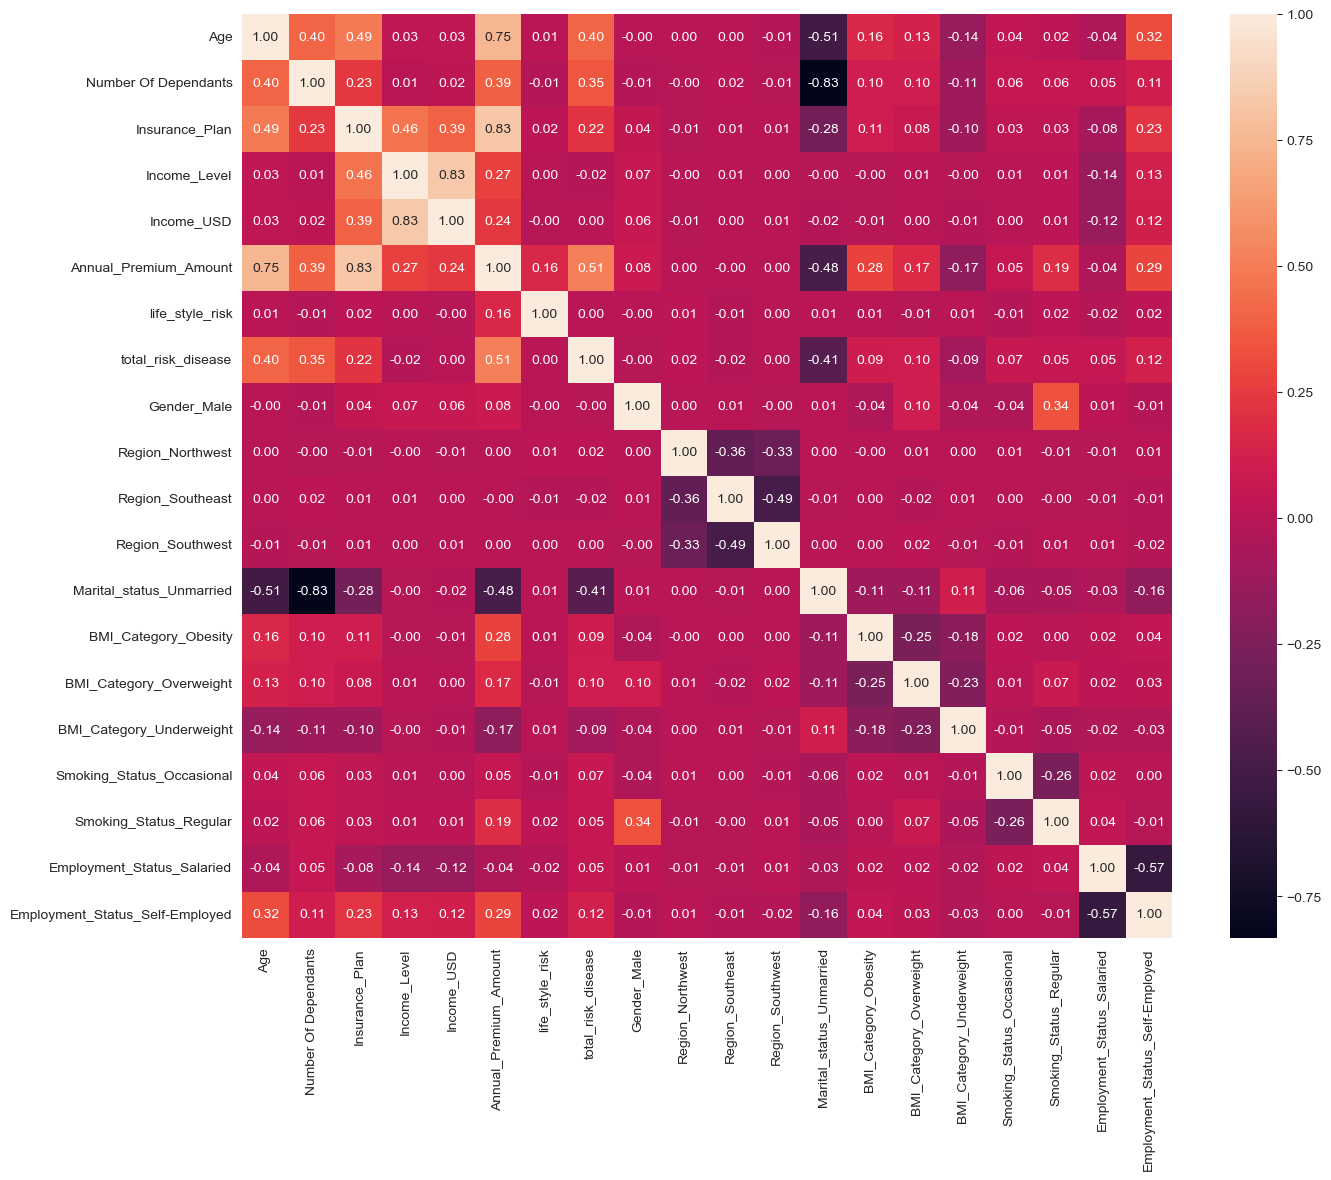

In [280]:
# Heatmap 
plt.figure(figsize=(15,12))
sns.heatmap(cm, annot=True, fmt='.2f')

### Check VIF

In [281]:
X = df2_encoded.drop(['Annual_Premium_Amount'], axis = 1)
y = df2_encoded['Annual_Premium_Amount']

In [282]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
list_scaler = ['Age','Number Of Dependants','Insurance_Plan','Income_Level','Income_USD']
X[list_scaler] = scaler.fit_transform(X[list_scaler])
X.head()

,Age,Number Of Dependants,Insurance_Plan,Income_Level,Income_USD,life_style_risk,total_risk_disease,Gender_Male,Region_Northwest,Region_Southeast,Region_Southwest,Marital_status_Unmarried,BMI_Category_Obesity,BMI_Category_Overweight,BMI_Category_Underweight,Smoking_Status_Occasional,Smoking_Status_Regular,Employment_Status_Salaried,Employment_Status_Self-Employed
0,0.703704,0.4,1.0,0.666667,0.467072,0.250,0.428571,0,0,1,0,1,0,0,0,0,0,0,1
1,0.370370,1.0,0.5,0.333333,0.116515,1.000,0.000000,0,0,0,0,0,0,1,0,1,0,0,0
2,0.000000,0.0,0.0,0.000000,0.103343,0.625,0.000000,0,0,0,1,1,0,0,0,0,0,0,0
3,0.685185,0.6,0.5,0.000000,0.103343,0.125,0.357143,1,0,0,0,0,0,1,0,1,0,1,0
4,0.074074,0.4,0.0,0.333333,0.156028,0.625,1.000000,1,0,1,0,1,0,0,0,0,1,0,1


In [283]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data) :
    df_vif = pd.DataFrame()
    df_vif['columns'] = data.columns
    df_vif['variance'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return df_vif

calculate_vif(X)

,columns,variance
0,Age,5.505687
1,Number Of Dependants,5.336299
2,Insurance_Plan,4.116444
3,Income_Level,7.520358
4,Income_USD,7.230381
5,life_style_risk,3.108593
6,total_risk_disease,3.002199
7,Gender_Male,1.908018
8,Region_Northwest,2.074063
9,Region_Southeast,2.943623


In [284]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data) :
    df_vif = pd.DataFrame()
    df_vif['columns'] = data.columns
    df_vif['variance'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return df_vif
calculate_vif(X.drop('Income_Level', axis = 1))

,columns,variance
0,Age,5.430576
1,Number Of Dependants,5.335057
2,Insurance_Plan,3.720160
3,Income_USD,2.686525
4,life_style_risk,3.108060
5,total_risk_disease,2.999064
6,Gender_Male,1.907014
7,Region_Northwest,2.073218
8,Region_Southeast,2.942759
9,Region_Southwest,2.678468


In [285]:
X.drop('Income_Level', axis = 1, inplace = True)

### Train model

In [286]:
# Train by Linear Regressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
mse_lr =mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"mse :{mse_lr}, r2_score : {r2_lr}, coef : {model_lr.coef_}, intercept : {model_lr.intercept_}")

mse :555.4949774595353, r2_score : 0.9569675536810563, coef : [136.75202076  -7.46105462 169.33515721  -3.19509969  61.65125998
  83.05822221   0.49728286   0.62382091   0.4376235   -0.93965575
 -10.82356121  53.28066441  26.63139252   5.20063675  14.83636041
  39.95735445   1.25540827   5.34996481], intercept : 48.71845685918399


In [287]:
print(f"X_train : {X_train.shape}, X_test : {X_test.shape}, y_train : {y_train.shape}, y_test : {y_test.shape}")

X_train : (7000, 18), X_test : (3000, 18), y_train : (7000,), y_test : (3000,)


<BarContainer object of 18 artists>

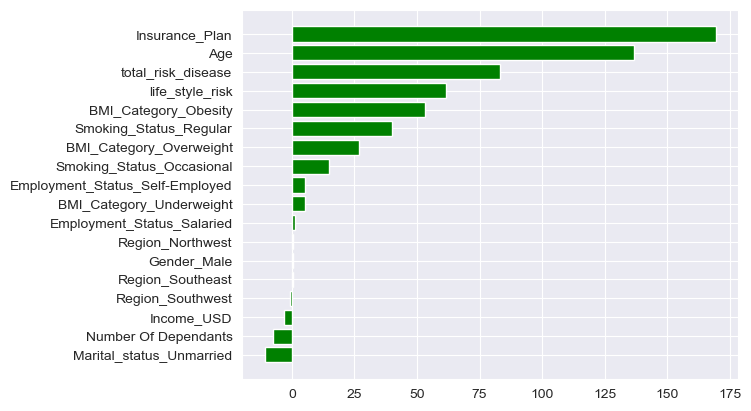

In [288]:
feature_importance_lr = model_lr.coef_
df_feature_importance_lr = pd.DataFrame(feature_importance_lr, index = X.columns, columns = ['Coefficient']).sort_values(by = 'Coefficient', ascending = True)
plt.barh(df_feature_importance_lr.index, df_feature_importance_lr['Coefficient'], color = 'green')

In [289]:
# Try with Ridge 
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"mse : {mse_ridge}, r2_score : {r2_ridge}, coeff : {model_ridge.coef_}, intercept : {model_ridge.intercept_}")

mse : 555.4973757715351, r2_score : 0.9569673678913794, coeff : [136.4323709   -7.40692331 169.22265193  -3.11112252  61.53496515
  82.96624287   0.50769119   0.62442888   0.43695925  -0.93826922
 -10.91213435  53.24746808  26.61987713   5.15342929  14.81390093
  39.9210597    1.28709166   5.42794117], intercept : 48.94911274708551


In [290]:
# Try with xgboost
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"mse :{mse_xgb}, r2_score : {r2_xgb}")

mse :89.5642212547739, r2_score : 0.9930617418705198


In [291]:
# Check features importance
feature_importance = model_xgb.feature_importances_
feature_importance

array([2.1763758e-01, 4.6756613e-04, 6.1515009e-01, 3.8418209e-04,
       1.6209418e-02, 2.9561734e-02, 3.7000474e-04, 3.3360001e-04,
       2.8208483e-04, 3.3894804e-04, 6.3784496e-04, 4.6857495e-02,
       2.2269443e-02, 1.6462945e-03, 5.2186097e-03, 4.1759524e-02,
       4.4581489e-04, 4.2970112e-04], dtype=float32)

In [292]:
#Create dataframe with features importance
df_feature_importance = pd.DataFrame(feature_importance, index = X.columns, columns = ['Coefficient']).sort_values('Coefficient', ascending = True)
df_feature_importance


,Coefficient
Region_Southeast,0.000282
Region_Northwest,0.000334
Region_Southwest,0.000339
Gender_Male,0.000370
Income_USD,0.000384
Employment_Status_Self-Employed,0.000430
Employment_Status_Salaried,0.000446
Number Of Dependants,0.000468
Marital_status_Unmarried,0.000638
BMI_Category_Underweight,0.001646


<BarContainer object of 18 artists>

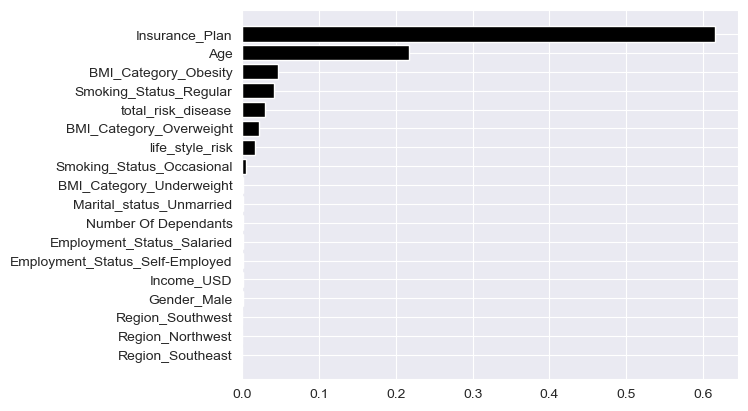

In [293]:
#Plot chart
plt.barh(df_feature_importance.index, df_feature_importance['Coefficient'], color = 'black')

In [294]:
best_model = model_xgb
list_scaler =['Age', 'Number Of Dependants','Insurance_Plan', 'Income_Level', 'Income_USD']

### Check errors range

In [295]:
errors_range =y_pred_xgb - y_test 
df_error_range = pd.DataFrame({
    'actual' : y_test,
    'predicted' : y_pred_xgb,
    'diff' : errors_range,
    'diff_pct' : errors_range*100 / y_test
})
df_error_range

,actual,predicted,diff,diff_pct
937,241.769231,248.988220,7.218989,2.985901
9355,95.076923,87.797394,-7.279529,-7.656463
2293,331.269231,331.065094,-0.204137,-0.061623
192,168.628205,183.739197,15.110992,8.961129
8675,323.012821,312.115753,-10.897067,-3.373571
...,...,...,...,...
4964,353.846154,357.451324,3.605171,1.018853
8978,316.884615,320.658386,3.773771,1.190897
7540,120.602564,122.531036,1.928472,1.599031
5275,427.230769,413.648834,-13.581935,-3.179063


In [296]:
df_extremely_error = df_error_range[abs(df_error_range['diff_pct']) > 10]
print(df_extremely_error.shape)
df_extremely_error

(214, 4)


,actual,predicted,diff,diff_pct
53,68.166667,81.666512,13.499845,19.804173
9366,164.705128,148.004333,-16.700795,-10.139815
3449,106.500000,94.693459,-11.806541,-11.085954
5128,106.923077,121.308647,14.385570,13.454130
4716,97.782051,110.841949,13.059898,13.356130
...,...,...,...,...
1042,100.128205,110.614059,10.485854,10.472428
1123,110.141026,123.377502,13.236477,12.017753
8269,108.000000,118.921097,10.921097,10.112127
9477,230.794872,255.405045,24.610173,10.663223


In [297]:
#Check % error 
pct_error = df_extremely_error.shape[0]*100 / df_error_range.shape[0]
pct_error

7.133333333333334

In [301]:
from joblib import dump
dump(best_model, "../app/artifact/best_model.joblib")
col_to_scaler = {
    'scaler' : MinMaxScaler(),
    'list_scaler' : list_scaler
}
dump(col_to_scaler, "../app/artifact/scaler.joblib")

['../app/artifact/scaler.joblib']

In [302]:
col_to_scaler

{'scaler': MinMaxScaler(),
 'list_scaler': ['Age',
  'Number Of Dependants',
  'Insurance_Plan',
  'Income_Level',
  'Income_USD']}

In [300]:
X.columns

Index(['Age', 'Number Of Dependants', 'Insurance_Plan', 'Income_USD',
       'life_style_risk', 'total_risk_disease', 'Gender_Male',
       'Region_Northwest', 'Region_Southeast', 'Region_Southwest',
       'Marital_status_Unmarried', 'BMI_Category_Obesity',
       'BMI_Category_Overweight', 'BMI_Category_Underweight',
       'Smoking_Status_Occasional', 'Smoking_Status_Regular',
       'Employment_Status_Salaried', 'Employment_Status_Self-Employed'],
      dtype='object')